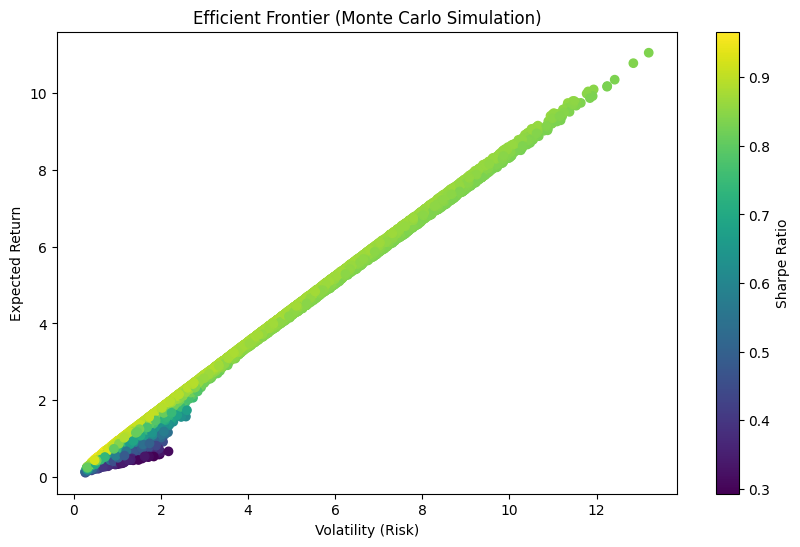

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
file_path = 'df_prices.csv'
data = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Рассчитываем дневные доходности
returns = data.pct_change().dropna()

# Количество случайных портфелей
num_portfolios = 10000

# Инициализируем массивы для хранения результатов
port_returns = []
port_volatility = []
port_weights = []
num_assets = len(returns.columns)

# Генерируем случайные портфели
for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # нормализуем веса
    
    # Рассчитываем доходность и риск портфеля
    port_return = np.sum(weights * returns.mean()) * 252  # годовая доходность
    port_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    
    port_returns.append(port_return)
    port_volatility.append(port_stddev)
    port_weights.append(weights)

# Преобразуем в DataFrame
efficient_portfolios = pd.DataFrame({
    'Return': port_returns,
    'Volatility': port_volatility
})

# Визуализация границы эффективных портфелей
plt.figure(figsize=(10, 6))
plt.scatter(efficient_portfolios['Volatility'], efficient_portfolios['Return'], c=efficient_portfolios['Return']/efficient_portfolios['Volatility'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Monte Carlo Simulation)')
plt.show()
